**ASSIGNMENT 1 - EMPIRICAL STUDY OF KNAPSACK PROBLEM**

**1. Group Description**

Group Number: 119 \\
Member Names: Alessandro Miguel Tirado \\
Member Student Numbers: 8349209 \\


**2. Knapsack Problem**

Give a description of the problem tackled.

In the Knapsack Problem we have a bag that can hold a limited amount of weight and we have multiple items. For each item, we know its weight and value. The goal is to fill the bag with items such that we've maximised the value, while not going over the weight limit.

**3. Dataset**

The dataset used is taken from Kaggle. Every row is a knapsack problem with 5 items. Each row has a value for Weights, Prices, Capacity and Best Value. Weights is a list of integers that represent the weights of each item. Prices is the list of price (or value) of each item. Capacity is the max weight that the knapsack can accept. Best pick is the Best combination of items for the knapsack problem. A 1 means the item is included and a 0 means the item is excluded from the knapsack. \\


**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np
import math
from operator import itemgetter
import matplotlib.pyplot as plt



**Read Dataset**

As outlined in the project description, it should be possible for the correctors to execute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, you can upload it to a public GitHub repository and provide a link to the raw version of the dataset.

The link to the raw version is as follows:
*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.csv*

For example:

https://raw.githubusercontent.com/baharin/KnapsackProblem/main/knapsack_5_items.csv

Now provide the link to YOUR dataset and read the dataset using pandas:

In [ ]:
url ="https://raw.githubusercontent.com/Ssel4/CSI4106/main/Assigmnent-1/knapsack_5_items.csv"

dataset = pd.read_csv(url)


Let's see what are the columns of the dataset? :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

As we expected, we have columns for weights, costs, capacity, best picks and best price for all the instances.

Now let's see the first 10 entries (rows):

In [ ]:
dataset.head(5)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0


**Preprocessing Step**

Typically, the initial step in any project that involves reading and handling data is data preprocessing and cleansing.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of floats or integers, like this: [45, 40, 42, 38, 10]

However, when you read each entry using pandas, they will be in a form of a string: "[45 40 42 38 10]"

So we need to convert these strings into "arrays of floats or integers." You can utilize the function provided below for this purpose:


In [ ]:
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

<ipython-input-113-833fb421dc49>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-833fb421dc49>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-833fb421dc49>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now it's time to implement the search algorithms. For each algorithm, a template is provided to you. You can modify this template if you want. But first you should try to go look at all the parameters used, as they are all important. You can also define any number of auxiliary functions you want.


**4. Generate and Test** \\
A generate and test approach will thoroughly check all possible combinations of items and find the best one. However because it searches by trial and error, it will take the most time and resource.

In [ ]:
def gen_and_test(data):

  dWeights=data["Weights"]
  dPrices=data["Prices"]
  dCapacity= data["Capacity"]
  weightCombo=[]
  priceCombo=[]

  for i in range (6):
    weightCombo+=list(itertools.combinations(dWeights,i)) #creates a list of all the possible combination of weights
    priceCombo+=list(itertools.combinations(dPrices,i)) #creates a list of all the possible combination of prices

  bestPrice=0
  bestSolution=0


  for i in range(len(weightCombo)):   #iterates through the all possible combination of items
    totalComboWeight=0
    totalComboPrice=0

    for n in range(len(weightCombo[i])):
      totalComboWeight+= weightCombo[i][n] # adds up the wieght for each possible combination
      totalComboPrice+= priceCombo[i][n]  # adds up the price for each possible combination

      if(totalComboWeight<= dCapacity and totalComboPrice > bestPrice): # if the weight is below or equal to capaciity and the combined price of all the items is greater than the current price then this becomes the new best solution and price
        bestPrice= totalComboPrice
        bestSolution = weightCombo[i]

  return bestPrice, bestSolution



In [ ]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)



In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


:**Your Analysis:**
Given that the mean of the list solutions is 1, we know that every solution found using the gen_and_test function returns the same solution as the ones provided by the kaggle author. Our optimal solution matches their optimal solution.


------------------------------------------------------------------------------------------------

**5. Greedy Search**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.


In a Greedy Algorithm, we try to make local optimisation with the idea that it will lead to a global optimisation.

With this in mind,we first determine each items price per weight, then we will sort each items order based on their price/weight in ascending order. Then we can simply add the item with the smallest ratio, one at a time while checking that all the conditions of the knapsnack are respected.

In [ ]:
def greedy(data):

  strWeights=data["Weights"]
  strPrices=data["Prices"]
  capacity=data["Capacity"]

  items=[]

  for i in range (len(strWeights)):
    items.append((strWeights[i],strPrices[i],strWeights[i]/strPrices[i])) #adds the weight , price and the ratio of weight per price as a tuple in the list

  sortedItems= sorted(items,key=itemgetter(2)) #sorts the tuples in the list using the third element of the tuples which is the ratio of weight/price

  currentWeight=0
  currentPrice=0
  knapsack=[]
  solution=[]

  for i in sortedItems:
    if(currentWeight+i[0] < capacity):  #If the item weight doesnt bring it over capacity then its added to the knapsack
      currentWeight+= i[0]
      currentPrice+= i[1]
      solution.append(i[0])
  return currentPrice, solution


In [ ]:
solutions_greedy1 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy1.append(1 if target == solution else 0)
solutions_greedy2 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy2.append(1 if target == solution else 0)
solutions_greedy3 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy3.append(1 if target == solution else 0)


In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy1))
print("Greedy Accuracy is", np.mean(solutions_greedy2))
print("Greedy Accuracy is", np.mean(solutions_greedy3))

Greedy Accuracy is 0.7808482639943314
Greedy Accuracy is 0.7808482639943314
Greedy Accuracy is 0.7808482639943314


**Your Analysis:** \\
Using a greedy algorithm we always obtain an accuracy of 0,78. While the majority of time it gets the best solution, it sometimes fails to obtain it. This shows that the greedy algorithm does not always find the global maximum and is stuck in a local maximum.

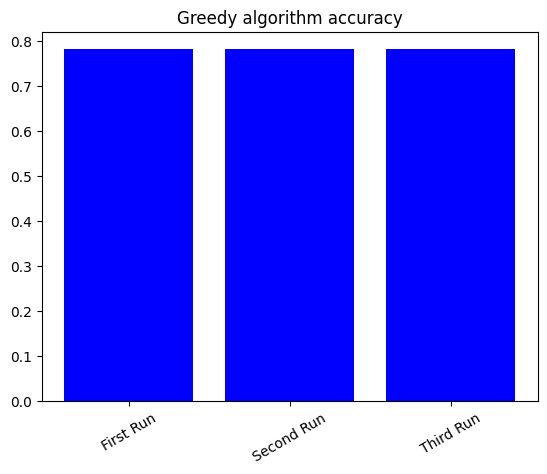

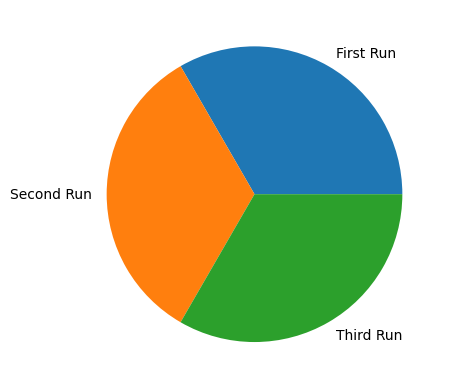

In [ ]:

x = np.array(["First Run", "Second Run", "Third Run"])
y = np.array([np.mean(solutions_greedy1),np.mean(solutions_greedy2),np.mean(solutions_greedy3)])
plt.title("Greedy algorithm accuracy")
plt.xticks(rotation=30)
plt.bar(x,y,color="BLUE")
plt.show()

plt.pie(y,labels= (["First Run", "Second Run", "Third Run"]))
plt.show()

------------------------------------------------------------------------------------------------

**6. Simulated Annealing**  
The simulated annealing will take an initial combination of items and over the course of n iterations, will compare the current combination with a slighty different combination. The one with the best fitness will be kept. However the one with the lower fitness may sometimes be taken depending on the the current temperature level and the difference of fitness. The higher the temperature, the more likely it is to accept a candidate with lower a fitness. The higher the difference the more likely it is to accept the candidate with lower fitness.

By sometimes allowing the less fit candidate to be selected, we explore more of the search space and we are sometimes able to find the global maximum that we would not have been able to with a deterministic approach.

In [ ]:
import random
import math

# will randomly switch a value in the knapsack form 1 to 0 or 0 to. (e.i. will include or exclude a random item)
def randomSwitch(currentKnapsack):
  similarKnapsack=np.copy(currentKnapsack)
  size= len(similarKnapsack)
  position= random.randint(0,size-1)
  if(similarKnapsack[position] == 0):
    similarKnapsack[position]=1
  else:
    similarKnapsack[position]=0
  return similarKnapsack

# Calculates and returns the weight and price in the knapsack.
# If the knapsack is over the weight capacity the price will be brought down to 0 since fitness = value.
def calculateWeightPrice(currentKnapsack,weights,prices,capacity):
  knapsackWeight=0
  knapsackPrice=0
  for i in range(len(currentKnapsack)):
    if(currentKnapsack[i]== 1):
      knapsackWeight+= weights[i]
      knapsackPrice+= prices[i]
  if (knapsackWeight > capacity):
    knapsackPrice=0
  return knapsackWeight , knapsackPrice

# Compares the combinations to see which one is kept
def compareCombinations(currentCombinationFitness, newCombinationFitness,temp):
  if(newCombinationFitness>currentCombinationFitness):                                # if new candidate is better then it replaces the current one
    return True

  else:                                                                               # there is a chance that the worst of the 2 options is choosen based on the current temperature and the difference in fitness
    acceptLessFit = np.exp( (newCombinationFitness-currentCombinationFitness)/ temp)  # the exponentiel of the difference in fitness between the current and new combination divided by the current temperature
    r = random.random()                                                               # generates a random number between 0 and less than 1
    if(r< acceptLessFit):
      return True
  return False


def simulated_annealing(row,n,initialTemp,coolingRate):


  currentCombination=[0,0,0,0,0]
  weights= row["Weights"]
  prices= row["Prices"]
  capacity= row["Capacity"]

  currentWeight=0
  currentFitness=0
  currentTemp= initialTemp


  for i in range(n):
    newCombination= randomSwitch(currentCombination)   #generates a new candidate combination
    newCombinationWeight, newCombinationFitness = calculateWeightPrice(newCombination,weights,prices,capacity)  #determine its weight and "fitness"(total price)


    if(compareCombinations(currentFitness,newCombinationFitness,currentTemp)): # if new candidate is better then it replaces the current one
      currentCombination= newCombination
      currentWeight, currentFitness = calculateWeightPrice(currentCombination,weights,prices,capacity)

    currentTemp= currentTemp*coolingRate


  return currentFitness, currentCombination


In [ ]:
solutions_sa1= []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, n = 10, initialTemp=1, coolingRate=0.95)
    solutions_sa1.append(1 if target == solution else 0)

print("\nFirst Run:\nSimulated Annealing Accuracy is", np.mean(solutions_sa1))

solutions_sa2 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, n = 10, initialTemp=1, coolingRate=0.95)
    solutions_sa2.append(1 if target == solution else 0)

print("\nSecond Run:\nSimulated Annealing Accuracy is", np.mean(solutions_sa2))

solutions_sa3 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, n = 10, initialTemp=1, coolingRate=0.95)
    solutions_sa3.append(1 if target == solution else 0)

print("\nThird Run: \nSimulated Annealing Accuracy is", np.mean(solutions_sa3))

solutions_sa4 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, n = 20, initialTemp=1, coolingRate=0.95)
    solutions_sa4.append(1 if target == solution else 0)

print("\nFourth Run: Higher number of iterations (n=20) \nSimulated Annealing Accuracy is", np.mean(solutions_sa4))

solutions_sa5 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, n = 5, initialTemp=1, coolingRate=0.95)
    solutions_sa5.append(1 if target == solution else 0)

print("\nFifth Run: Lower number of iterations (n=5) \nSimulated Annealing Accuracy is", np.mean(solutions_sa5))

solutions_sa6 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, n = 10, initialTemp=1, coolingRate=0.25)
    solutions_sa6.append(1 if target == solution else 0)

print("\nSixth Run: Low Cooling Rate (cooling rate=0.25) \nSimulated Annealing Accuracy is", np.mean(solutions_sa6))

solutions_sa7 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, n = 10, initialTemp=1, coolingRate=0.50)
    solutions_sa7.append(1 if target == solution else 0)

print("\nSeventh Run: Medium Cooling Rate (cooling rate=0.50)\nSimulated Annealing Accuracy is", np.mean(solutions_sa7))

solutions_sa8 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, n = 10, initialTemp=1, coolingRate=0.90)
    solutions_sa8.append(1 if target == solution else 0)

print("\nEighth Run: Medium Cooling Rate (cooling rate=0.90)\nSimulated Annealing Accuracy is", np.mean(solutions_sa8))



First Run:
Simulated Annealing Accuracy is 0.29648749873468977

Second Run:
Simulated Annealing Accuracy is 0.3030671120558761

Third Run: 
Simulated Annealing Accuracy is 0.292438505921652

Fourth Run: Higher number of iterations (n=20) 
Simulated Annealing Accuracy is 0.3947767992711813

Fifth Run: Lower number of iterations (n=5) 
Simulated Annealing Accuracy is 0.1651989067719405

Sixth Run: Low Cooling Rate (cooling rate=0.25) 
Simulated Annealing Accuracy is 0.2972972972972973

Seventh Run: Medium Cooling Rate (cooling rate=0.50)
Simulated Annealing Accuracy is 0.2982083206802308

Eighth Run: Medium Cooling Rate (cooling rate=0.90)
Simulated Annealing Accuracy is 0.3011438404696832


**Your Analysis:** \\
When we use the simulated annealing algorithm, we see that the result on the same data will not always lead to the same result due to the random nature of the algorithm (see run 1, 2 and 3). However we do see that on average, given the same parameters, the accuracies trend towards the same result.




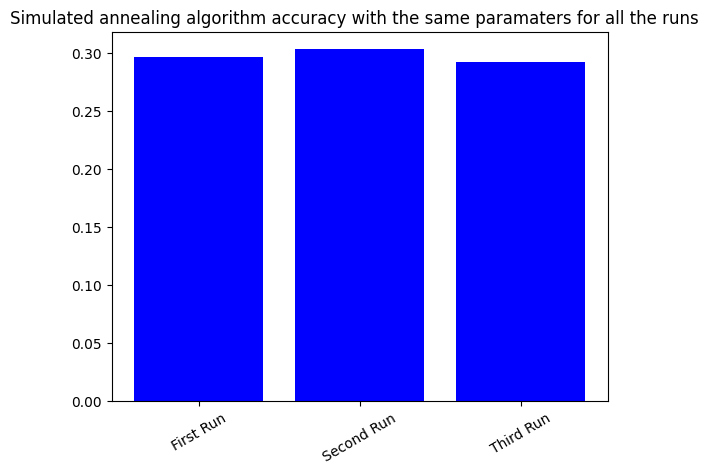

In [ ]:
x = np.array(["First Run", "Second Run", "Third Run"])
y = np.array([np.mean(solutions_sa1),np.mean(solutions_sa2), np.mean(solutions_sa3)])
plt.title("Simulated annealing algorithm accuracy with the same paramaters for all the runs  ")
plt.xticks(rotation=30)
plt.bar(x,y,color="blue")
plt.show()

When we change the cooling rate, we see that the accuracy is not affected.




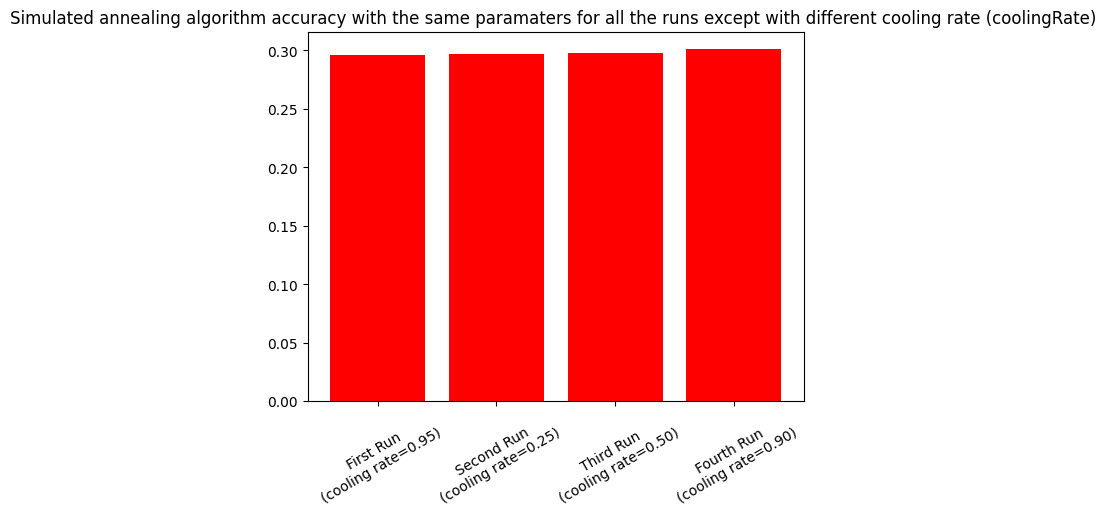

In [ ]:
x = np.array(["First Run\n(cooling rate=0.95)", "Second Run\n(cooling rate=0.25)", "Third Run\n(cooling rate=0.50)","Fourth Run\n(cooling rate=0.90)"])
y = np.array([np.mean(solutions_sa1),np.mean(solutions_sa6),np.mean(solutions_sa7), np.mean(solutions_sa8)])
plt.title("Simulated annealing algorithm accuracy with the same paramaters for all the runs except with different cooling rate (coolingRate) ")
plt.xticks(rotation=30)
plt.bar(x,y,color="red")
plt.show()


However when we change the number of iterations (n), we see that the accuracy is affected (see run 1, 3 and 4). When the number of iterations is lowered, we have a decrease in accuracy and when we have a higher number of iterations, we have an increase in accuracy.


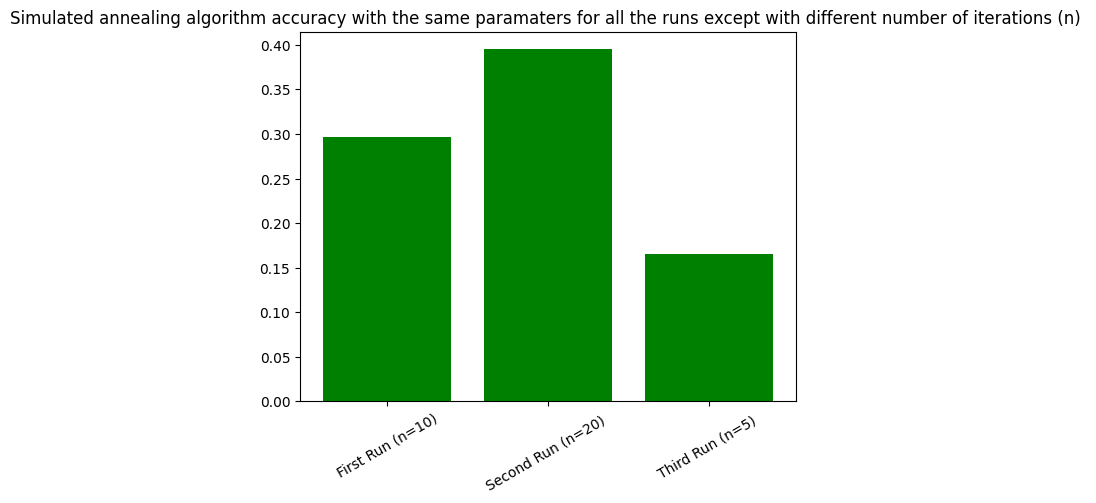

In [ ]:
x = np.array(["First Run (n=10)", "Second Run (n=20) ", "Third Run (n=5) "])
y = np.array([np.mean(solutions_sa1),np.mean(solutions_sa4), np.mean(solutions_sa5)])
plt.title("Simulated annealing algorithm accuracy with the same paramaters for all the runs except with different number of iterations (n) ")
plt.xticks(rotation=30)
plt.bar(x,y,color="green")
plt.show()

------------------------------------------------------------------------------------------------

**7. Genetic Algorithm** \\
In the genetic algorithm we consider an individual a possible combination of items in the knapsack. A gene is an item and the alleles for that gene is whether or not the item is included (1 meaning is included and 0 excluded).

We start by generating a random population of individual. From that initial population we randomly select individuals to compete in a tournement where the fittest is added to the next generation. Then based on the crossover rate and mutation rate, theres a chance they are modified by one or both events. A crossover is when 2 chromosomes exchange parts of themselves, in this problem this would mean that a part of the list holding the items would exchange with other individuals item list. A mutation is a random modifications of a gene, meaning that an item is either randomly included or excluded depending on its original value.



In [ ]:
import random

# Creates a random initial population (Random combination of knapsacks)
def generateInitialPopulation(popSize,indiSize):
  initialPopulation=[]
  for i in range(popSize):
    pop = []
    for j in range(indiSize):
      pop.append(random.randint(0,1))
    initialPopulation.append(pop)

  return initialPopulation

# Calculates and returns the fitness of the individual (knapsack)
# If the knapsack is over the weight capacity the price will be brought down to 0 since fitness = value.
def calculate_fitness(ind, prices, weights, capacity):
  totalWeight=0
  fitness=0
  for i in range (len(ind)):
    if (ind[i]==1):
      totalWeight+=weights[i]
      fitness+=prices[i]
  if(totalWeight>capacity):
    fitness=0
  return fitness

# Selects at random individuass from the given population.
# The fitess individual is returned.
def tournament(population,prices, weights, capacity, tournamentSize):
  fittest=[]
  subPop=[]
  subPopFitness=[]

  for i in range(tournamentSize):
    pick= random.randint(0,len(population)-1)

    subPop.append(population[pick])
    subPopFitness.append(calculate_fitness(subPop[i],prices,weights,capacity))  #calculates fitness of every individual pop

  fittest= subPop[ subPopFitness.index(max(subPopFitness))]
  return fittest

# Determines if a cross-over occures. If the random number is lower than the
# crossover rate, a 1 point crossover will happen at a random position (the children will have one part of each parent).
def crossover(parent1, parent2, cross_rate):
  child1=[]
  child2=[]
  if(random.random() < cross_rate):
    crossOverPosition = random.randint(0,len(parent1))
    for i in range(crossOverPosition):
      child1.append(parent1[i])
      child2.append(parent2[i])
    for j in range(crossOverPosition,len(parent1)):
      child1.append(parent2[j])
      child2.append(parent1[j])
  else:
    child1=parent1
    child2=parent2

  return child1, child2

# Mutates the individual based on the mutation rate. We go over every item to see and generate a random number.
# If the random number is lower than the mutation rate then we have a "mutation".
# Each item in the knapsack has a random of being included or excluded.
def mutation(child, mut_rate):
  for i in range(len(child)):
    if(random.random()<mut_rate):
      if(child[i]==0):
        child[i]=1
      else:
        child[i]=0
  return child


def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):

  prices= data["Prices"]
  weights= data["Weights"]
  capacity = data["Capacity"]

  best_solution_price=0
  best_solution=[]

  currentPop = generateInitialPopulation(population_size,5)             #generates a random population
  popFitness=[]



  for i in range(num_generations):
    nextGeneration=[]
    while(len(nextGeneration)<population_size):
      #tournament
      parent1 = tournament(currentPop,prices,weights,capacity,tournament_size)       #tournament with replacement
      parent2 = tournament(currentPop,prices,weights,capacity,tournament_size)

      #crossover
      parent1, parent2 = crossover(parent1,parent2,cross_rate)

      #mutation
      mutation(parent1,mut_rate)
      mutation(parent2,mut_rate)

      nextGeneration.append(parent1)
      nextGeneration.append(parent2)

    currentPop= nextGeneration.copy()

  for j in range(len(nextGeneration)):
    popFitness.append(calculate_fitness(nextGeneration[j],prices,weights,capacity)) #calculate the fitness of the last generation to return the best solution


  best_solution= nextGeneration[(popFitness.index(max(popFitness)))]
  best_solution_price =max(popFitness)

  return best_solution_price, best_solution


First Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.752606539123393

First Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.7578702297803421

First Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.7700172082194554


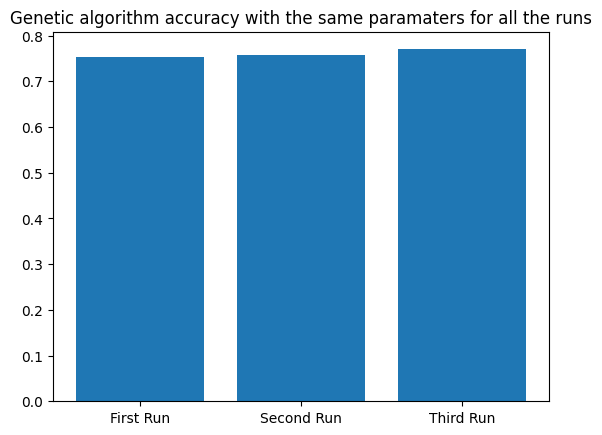

In [ ]:
solutions_ga_1 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_1.append(1 if target == solution else 0)

print("\nFirst Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_1))


solutions_ga_2 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_2.append(1 if target == solution else 0)

print("\nFirst Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_2))

solutions_ga_3 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_3.append(1 if target == solution else 0)

print("\nFirst Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_3))

x = np.array(["First Run", "Second Run", "Third Run"])
y = np.array([np.mean(solutions_ga_1),np.mean(solutions_ga_2), np.mean(solutions_ga_3)])
plt.bar(x,y)
plt.title("Genetic algorithm accuracy with the same paramaters for all the runs")
plt.show()



First Run: population_size = 15, num_generations = 5, mut_rate = 0.0, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.5487397509869419

Second Run: population_size = 15, num_generations = 5, mut_rate = 0.05, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.7070553699767183

Third Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.7593886020852313

Fourth Run: population_size = 15, num_generations = 5, mut_rate = 0.3, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.5156392347403583

Fifth Run: population_size = 15, num_generations = 5, mut_rate = 0.5, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.377163680534467

Sixth Run: population_size = 15, num_generations = 5, mut_rate = 0.7, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.3261463710901913


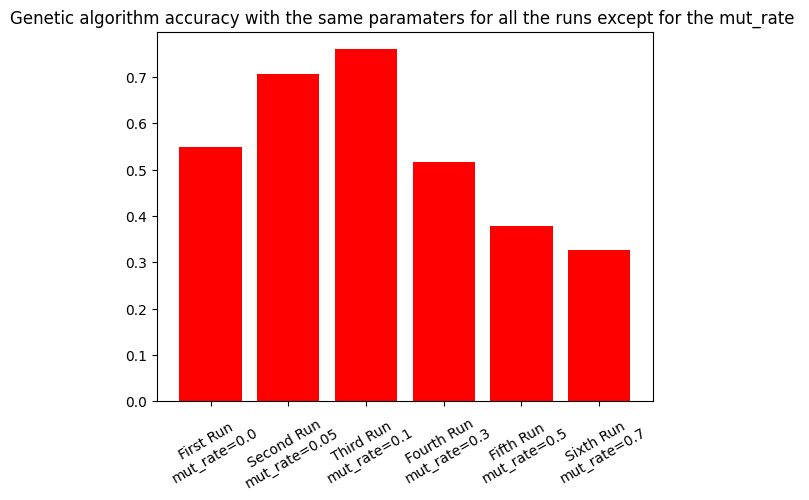

In [ ]:
solutions_ga_4 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.0, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_4.append(1 if target == solution else 0)

print("\nFirst Run: population_size = 15, num_generations = 5, mut_rate = 0.0, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_4))

solutions_ga_5 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.05, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_5.append(1 if target == solution else 0)

print("\nSecond Run: population_size = 15, num_generations = 5, mut_rate = 0.05, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_5))


solutions_ga_6 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_6.append(1 if target == solution else 0)

print("\nThird Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_6))


solutions_ga_7 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.3, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_7.append(1 if target == solution else 0)

print("\nFourth Run: population_size = 15, num_generations = 5, mut_rate = 0.3, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_7))

solutions_ga_8 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.5, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_8.append(1 if target == solution else 0)

print("\nFifth Run: population_size = 15, num_generations = 5, mut_rate = 0.5, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_8))

solutions_ga_9 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.7, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_9.append(1 if target == solution else 0)

print("\nSixth Run: population_size = 15, num_generations = 5, mut_rate = 0.7, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_9))



x = np.array(["First Run\nmut_rate=0.0", "Second Run\nmut_rate=0.05", "Third Run\nmut_rate=0.1", "Fourth Run\nmut_rate=0.3","Fifth Run\nmut_rate=0.5", "Sixth Run\nmut_rate=0.7"])
y = np.array([np.mean(solutions_ga_4),np.mean(solutions_ga_5), np.mean(solutions_ga_6), np.mean(solutions_ga_7),np.mean(solutions_ga_8), np.mean(solutions_ga_9)])
plt.title("Genetic algorithm accuracy with the same paramaters for all the runs except for the mut_rate ")
plt.xticks(rotation=30)
plt.bar(x,y,color="red")
plt.show()


First Run:  population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.1, tournament_size = 5
Genetic Algorithm Accuracy is 0.1337179876505719

Second Run:  population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.3, tournament_size = 5
Genetic Algorithm Accuracy is 0.4023686607956271

Third Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.5, tournament_size = 5
Genetic Algorithm Accuracy is 0.6296183824273712

Fourth Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5
Genetic Algorithm Accuracy is 0.7583763538819719

Fifth Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.9, tournament_size = 5
Genetic Algorithm Accuracy is 0.815770827006782


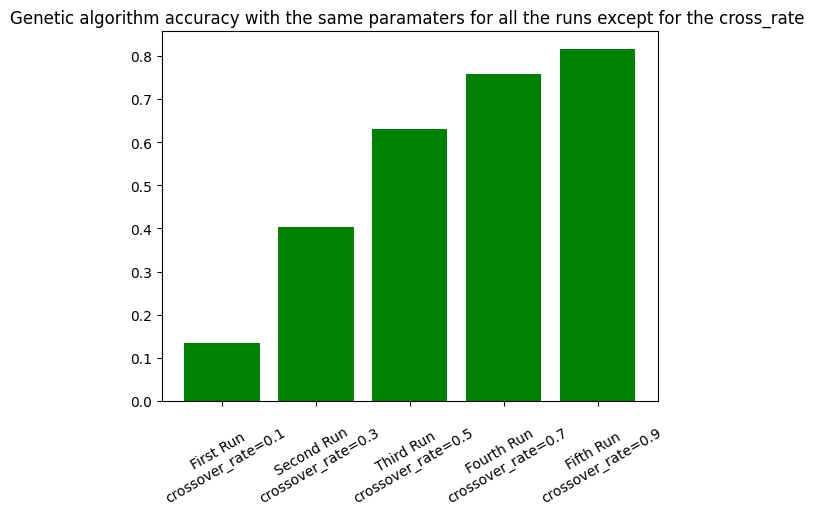

In [ ]:
solutions_ga_10 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.1, tournament_size = 5)
    solutions_ga_10.append(1 if target == solution else 0)

print("\nFirst Run:  population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.1, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_10))


solutions_ga_11 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.3, tournament_size = 5)
    solutions_ga_11.append(1 if target == solution else 0)

print("\nSecond Run:  population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.3, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_11))

solutions_ga_12 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.5, tournament_size = 5)
    solutions_ga_12.append(1 if target == solution else 0)

print("\nThird Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.5, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_12))

solutions_ga_13 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga_13.append(1 if target == solution else 0)

print("\nFourth Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_13))

solutions_ga_14 = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.9, tournament_size = 5)
    solutions_ga_14.append(1 if target == solution else 0)

print("\nFifth Run: population_size = 15, num_generations = 5, mut_rate = 0.1, cross_rate = 0.9, tournament_size = 5\nGenetic Algorithm Accuracy is", np.mean(solutions_ga_14))


x = np.array(["First Run\ncrossover_rate=0.1", "Second Run\ncrossover_rate=0.3", "Third Run\ncrossover_rate=0.5", "Fourth Run\ncrossover_rate=0.7", "Fifth Run\ncrossover_rate=0.9"])
y = np.array([np.mean(solutions_ga_10),np.mean(solutions_ga_11), np.mean(solutions_ga_12), np.mean(solutions_ga_13),np.mean(solutions_ga_14)])
plt.xticks(rotation=30)
plt.title("Genetic algorithm accuracy with the same paramaters for all the runs except for the cross_rate ")
plt.bar(x,y,color="green")
plt.show()

**Your Analysis:** \\
The genetic algorithm accuracy is not always the same with the same set of parameters due to the random nature of the algorithm but the accurac trends towards the same result.

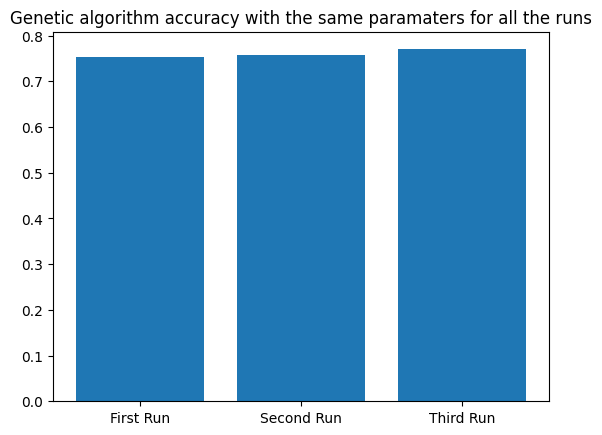

In [ ]:
x = np.array(["First Run", "Second Run", "Third Run"])
y = np.array([np.mean(solutions_ga_1),np.mean(solutions_ga_2), np.mean(solutions_ga_3)])
plt.bar(x,y)
plt.title("Genetic algorithm accuracy with the same paramaters for all the runs")
plt.show()

When we run the algorithm with different mutation rate, we can see that having a mutation rate of 0 leads to a lower accuracy than 0.1 which is the rate of mutation found in nature. This shows that mutations are beneficial. However when the rate of mutation increases to much we also see a loss in accuracy. So the mutations increase the accuracy but only to a certain extent.   

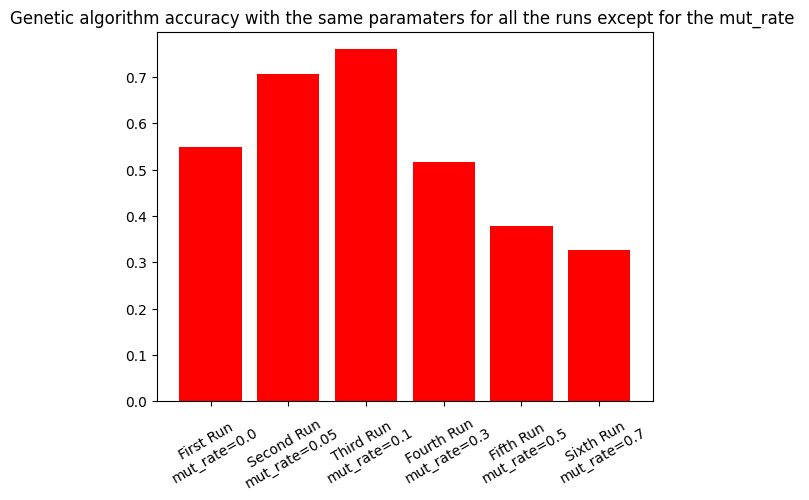

In [ ]:
x = np.array(["First Run\nmut_rate=0.0", "Second Run\nmut_rate=0.05", "Third Run\nmut_rate=0.1", "Fourth Run\nmut_rate=0.3","Fifth Run\nmut_rate=0.5", "Sixth Run\nmut_rate=0.7"])
y = np.array([np.mean(solutions_ga_4),np.mean(solutions_ga_5), np.mean(solutions_ga_6), np.mean(solutions_ga_7),np.mean(solutions_ga_8), np.mean(solutions_ga_9)])
plt.title("Genetic algorithm accuracy with the same paramaters for all the runs except for the mut_rate ")
plt.xticks(rotation=30)
plt.bar(x,y,color="red")
plt.show()

When we run the algorithm with a different crossover rate, we see that increasing the crossover rate also increases the accuracy of the algorithm.

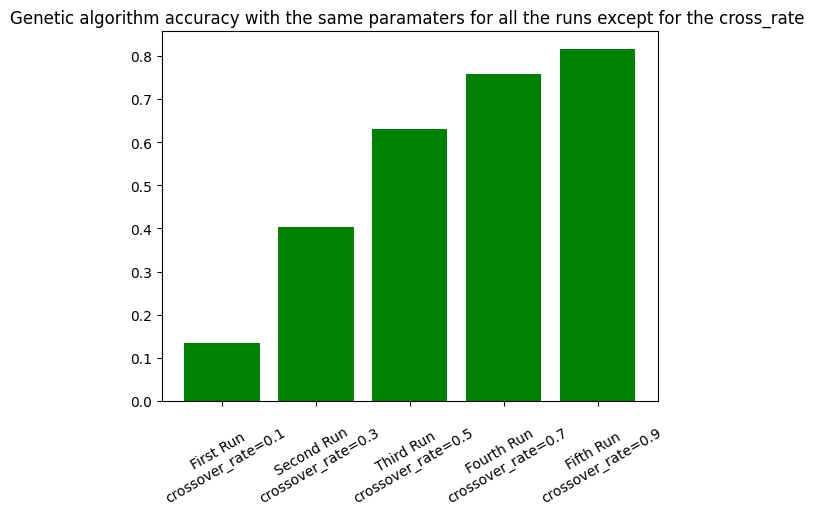

In [ ]:

x = np.array(["First Run\ncrossover_rate=0.1", "Second Run\ncrossover_rate=0.3", "Third Run\ncrossover_rate=0.5", "Fourth Run\ncrossover_rate=0.7", "Fifth Run\ncrossover_rate=0.9"])
y = np.array([np.mean(solutions_ga_10),np.mean(solutions_ga_11), np.mean(solutions_ga_12), np.mean(solutions_ga_13),np.mean(solutions_ga_14)])
plt.xticks(rotation=30)
plt.title("Genetic algorithm accuracy with the same paramaters for all the runs except for the cross_rate ")
plt.bar(x,y,color="green")
plt.show()

--------------------------------------------------------------------------


**8. Comparative Study**

Did this in Analysis of each algorithm

--------------------------------------------------------------------------


**9. Conclusion**

Each algortihm can obtain the optimal result however some are more consistent than others. The greedy algorithm is deterministic and will therefor always return the same result even if its not the best possible one. The simulated annealing algorithm and genetic algorithm are heuristic algortihms that given appropriate parameters have a probibility  of finding the optimal results. They may not always obtain it but at least finding it is possible.

--------------------------------------------------------------------------


**10 References**



https://www.w3schools.com/python/python_lists.asp \\
https://pandas.pydata.org/docs/reference/frame.html \\
https://jamesmccaffrey.wordpress.com/2021/12/17/knapsack-problem-using-simulated-annealing-example/ \\
https://arpitbhayani.me/blogs/genetic-knapsack/ \\
https://www.w3schools.com/python/matplotlib_bars.asp \\
https://uottawa.brightspace.com/d2l/le/content/392261/viewContent/5543376/View \\


**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".